In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn.model_selection import GridSearchCV

In [57]:
def confusion_mat(confusion):
    TN = confusion[0][0]
    FN = confusion[1][0]
    TP = confusion[1][1]
    FP = confusion[0][1]
    sensitivity_test = TP/(TP+FN)*100
    specificity_test = TN/(FP+TN)*100
    return sensitivity_test,specificity_test

In [58]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [59]:
df=pd.read_csv("titanic.csv")

In [60]:
df.drop(df.columns[[0]], axis=1, inplace=True)
print(df.head())

  pclass  survived                             name     sex      age  sibsp  \
0    1st         1    Allen, Miss. Elisabeth Walton  female  29.0000      0   
1    1st         1   Allison, Master. Hudson Trevor    male   0.9167      1   
2    1st         0     Allison, Miss. Helen Loraine  female   2.0000      1   
3    1st         0  Allison, Mr. Hudson Joshua Crei    male  30.0000      1   
4    1st         0  Allison, Mrs. Hudson J C (Bessi  female  25.0000      1   

   parch  ticket        fare    cabin     embarked boat   body  \
0      0   24160  211.337494       B5  Southampton    2    NaN   
1      2  113781  151.550003  C22 C26  Southampton   11    NaN   
2      2  113781  151.550003  C22 C26  Southampton  NaN    NaN   
3      2  113781  151.550003  C22 C26  Southampton  NaN  135.0   
4      2  113781  151.550003  C22 C26  Southampton  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ /

Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same
feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [61]:
df=df[["pclass","sex","age","sibsp","survived"]]
df["pclass"]=df["pclass"].map({"1st":1,"2nd":2,"3rd":3})
df["sex"]=df["sex"].map({"female":1,"male":0})
df["age"].fillna((df["age"].mean()),inplace=True)
df= df.dropna()
df.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [62]:
X=df.drop("survived",axis=1)
y=df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure and size of your tree can be different):

In [63]:
#Decision Tree 
dt = DecisionTreeClassifier()

model = dt.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity_test,specificity_test= confusion_mat(conf_matrix)

print("\033[1m",f"percent survivors correctly predicted on Test Set before Pruning= {(sensitivity_test):.3f}","\033[0m" )
print("\033[1m",f"percent fatalities correctly predicted on Test Set before Pruning= {(specificity_test):.3f}","\033[0m" )
#print("Accuracy: ",accuracy_score(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.72      0.90      0.80       144
           1       0.82      0.58      0.68       118

    accuracy                           0.76       262
   macro avg       0.77      0.74      0.74       262
weighted avg       0.77      0.76      0.75       262

 percent survivors correctly predicted on Test Set before Pruning= 58.475 
 percent fatalities correctly predicted on Test Set before Pruning= 89.583 


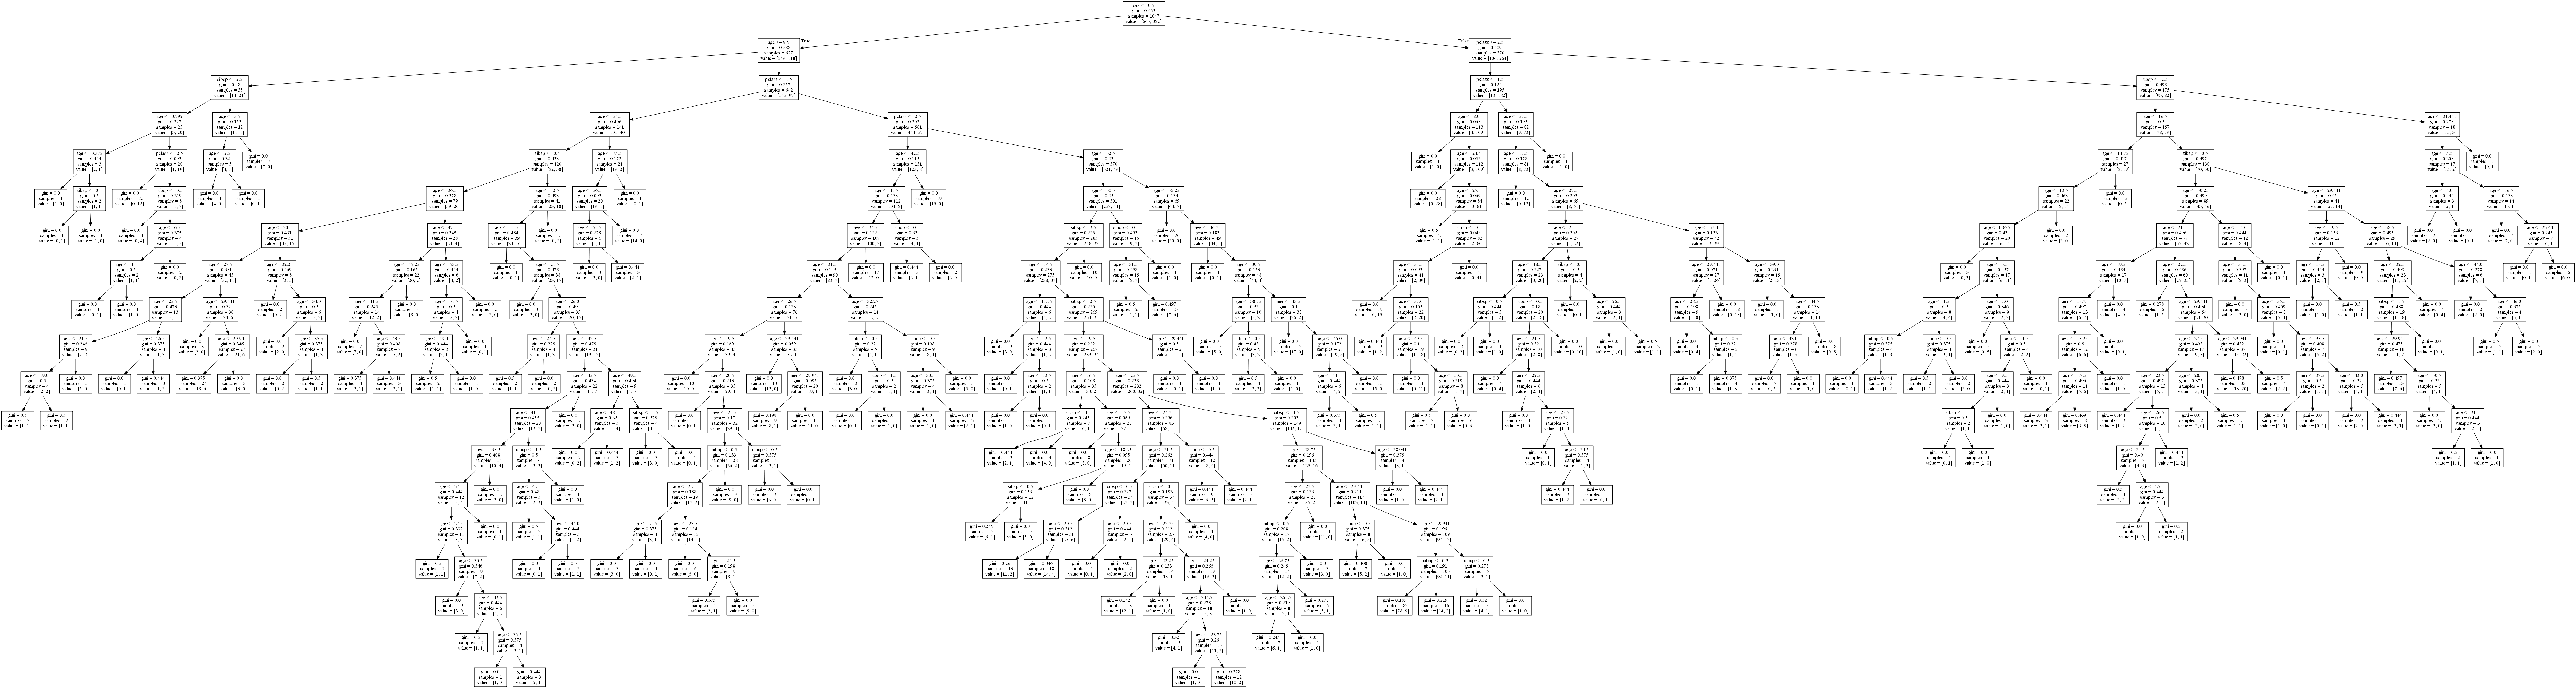

In [64]:
#Plotting Decision Tree
data = export_graphviz(dt, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2

In [65]:
params = {'max_leaf_nodes': range(2,150)}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=10)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 150)},
             pre_dis

In [66]:
print("Best parameters set found on Training set:")
print()
print("\033[1m",grid_search_cv.best_params_,"\033[0m")

Best parameters set found on Training set:

 {'max_leaf_nodes': 5} 


              precision    recall  f1-score   support

           0       0.69      0.97      0.81       144
           1       0.93      0.47      0.62       118

    accuracy                           0.74       262
   macro avg       0.81      0.72      0.71       262
weighted avg       0.80      0.74      0.72       262



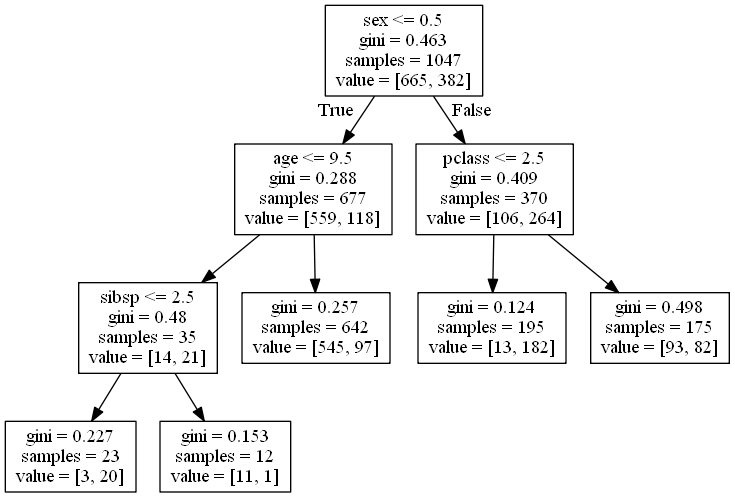

In [67]:
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

data = export_graphviz(clf, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())


For the pruned tree, report its accuracy on the test set for the following: 
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity_test,specificity_test= confusion_mat(conf_matrix)
print("\033[1m",f"percent survivors correctly predicted on Test Set after pruning= {(sensitivity_test):.3f}","\033[0m" )
print("\033[1m",f"percent fatalities correctly predicted on Test Set after pruning= {(specificity_test):.3f}","\033[0m" )

 percent survivors correctly predicted on Test Set after pruning= 46.610 
 percent fatalities correctly predicted on Test Set after pruning= 97.222 


Use the RandomForestClassifier() function to train a random forest using the value of
max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of
random forest on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [69]:
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42,max_leaf_nodes=5)
rnd_clf = rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity_test,specificity_test= confusion_mat(conf_matrix)
print("\033[1m",f"percent survivors correctly predicted on Test Set using Random Forest= {(sensitivity_test):.3f}","\033[0m" )
print("\033[1m",f"percent fatalities correctly predicted on Test Set using Random Forest= {(specificity_test):.3f}","\033[0m" )

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       144
           1       0.91      0.45      0.60       118

    accuracy                           0.73       262
   macro avg       0.80      0.71      0.70       262
weighted avg       0.79      0.73      0.71       262

 percent survivors correctly predicted on Test Set using Random Forest= 44.915 
 percent fatalities correctly predicted on Test Set using Random Forest= 96.528 


Check whether there is improvement as compared to a single tree obtained in Step 4.



In [70]:
print("\033[1m"+"According to the Accurary received for both Decision Tree and Random forest, after finding the most optimum number of leaf node as 5, Decison tree is giving a better accurary in compared to Random Forest for the model which I trained.","\033[0m")

According to the Accurary received for both Decision Tree and Random forest, after finding the most optimum number of leaf node as 5, Decison tree is giving a better accurary in compared to Random Forest for the model which I trained. 
